### Comparison of Law School vs Masters Degrees in STEM

This workbook plots salary vs indebtedness for Law School (JD programs) and MS programs in STEM fields (Engineering, Computer Science, Math).

The division is remarkably clean - it is very unusual for a MS degree recipient in STEM to have a debt level that exceeds first year income, whereas it is very unusual for a JD grad to have a first year income that exceeds debt level.

In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('data/FieldOfStudyData1516_1617_PP.csv')

In [4]:
df_top = pysqldf("""
SELECT 
    CIPCODE,
    INSTNM, 
    CIPDESC,
    CREDDESC,
    CREDLEV,
    EARN_COUNT_WNE_HI_1YR * 1 AS COHORT_SIZE,
    EARN_MDN_HI_1YR * 1.0 AS EARN_MED_1YR,
    DEBT_ALL_STGP_EVAL_MDN * 1.0 AS DEBT_MED,
    (DEBT_ALL_STGP_EVAL_MDN * 1.0) / (EARN_MDN_HI_1YR * 1.0) AS DEBT_RATIO
FROM 
    df 
WHERE
    CREDLEV >= 5
AND
    EARN_MED_1YR * 1.0 > 0
AND
    DEBT_MED * 1.0 > 0
AND 
    COHORT_SIZE > 0
ORDER BY EARN_MED_1YR
""")

In [5]:
pysqldf("SELECT DISTINCT CIPCODE, CIPDESC FROM df_top")

,CIPCODE,CIPDESC
0,5101,Chiropractic.
1,3001,Biological and Physical Sciences.
2,5112,Medicine.
3,5133,Alternative and Complementary Medicine and Medical Systems.
4,5007,Fine and Studio Arts.
5,5009,Music.
6,5004,Design and Applied Arts.
7,2601,"Biology, General."
8,5099,"Visual and Performing Arts, Other."
9,4301,Criminal Justice and Corrections.


In [6]:
df_top_sector = pysqldf("""
SELECT DISTINCT 
    *,
    CASE 
        WHEN CIPCODE LIKE '51%' THEN 'Health'
        WHEN CIPCODE LIKE '60%' THEN 'Health'
        WHEN CIPCODE LIKE '52%' THEN 'Business'
        WHEN CIPCODE LIKE '22%' THEN 'Law'
        WHEN CIPCODE LIKE '11%' THEN 'STEM'
        WHEN CIPCODE LIKE '14%' THEN 'STEM'
        WHEN CIPCODE LIKE '27%' THEN 'STEM'
    ELSE
        'Other'
    END AS SECTOR
FROM df_top
WHERE SECTOR IN ('Law', 'STEM') 
""")

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

### Plot 1st year starting salary and debt level for Law JD vs STEM MS degrees. 

Dot size represents the size of the graduating cohort. 

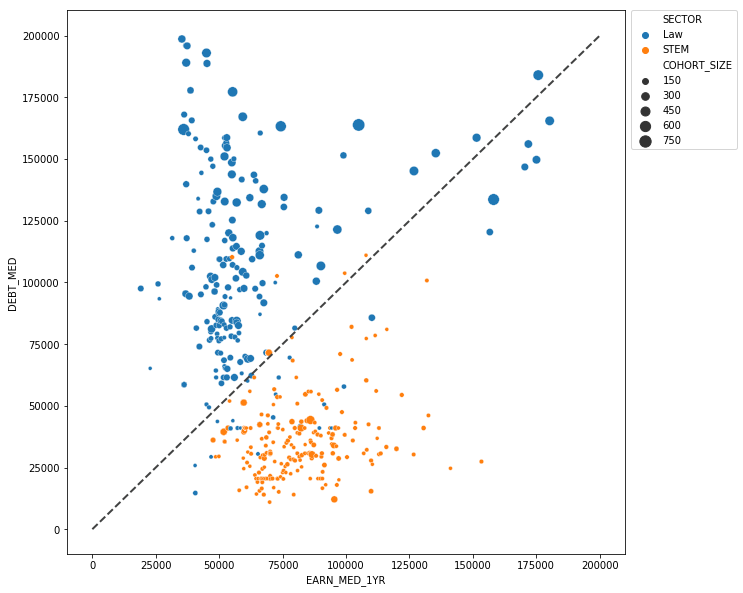

In [8]:
plt.figure(figsize=(10,10))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_top_sector, x="EARN_MED_1YR", y="DEBT_MED", hue="SECTOR", size="COHORT_SIZE", sizes = (15,150))
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [9]:
pysqldf("SELECT * FROM df_top_sector ORDER BY EARN_MED_1YR DESC")

,CIPCODE,INSTNM,CIPDESC,CREDDESC,CREDLEV,COHORT_SIZE,EARN_MED_1YR,DEBT_MED,DEBT_RATIO,SECTOR
0,2201,Columbia University in the City of New York,Law.,First Professional Degree,7,486,180300.0,165500.0,0.917915,Law
1,2201,New York University,Law.,First Professional Degree,7,614,175800.0,184028.0,1.046803,Law
2,2201,University of Pennsylvania,Law.,First Professional Degree,7,373,175100.0,149729.0,0.855106,Law
3,2201,Northwestern University,Law.,First Professional Degree,7,357,171900.0,156110.0,0.908144,Law
4,2201,University of Chicago,Law.,First Professional Degree,7,284,170500.0,146806.0,0.861032,Law
5,2201,Harvard University,Law.,First Professional Degree,7,773,158200.0,133617.0,0.844608,Law
6,2201,Stanford University,Law.,First Professional Degree,7,255,156700.0,120422.0,0.768488,Law
7,1107,Stanford University,Computer Science.,Master's Degree,5,55,153400.0,27400.0,0.178618,STEM
8,2201,University of Virginia-Main Campus,Law.,First Professional Degree,7,410,151500.0,158654.0,1.047221,Law
9,1107,University of California-San Diego,Computer Science.,Master's Degree,5,24,141200.0,24669.0,0.174710,STEM
